In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from datasets_utils import ds_load
from sklearn.preprocessing import StandardScaler

In [ ]:
def calc_feature_importance(ptsnet):
    proto_features_importances = []
    for enc_out in range(len(ptsnet.features.masks)):
        mask = ptsnet.features.masks[enc_out]
        weights_for_enc_out = ptsnet.add_on_layers[0].weight.data[:, enc_out, 0]
        product = np.multiply(np.array(mask).reshape((-1, 1)), weights_for_enc_out.numpy().reshape((1, -1)))
        proto_features_importances.append(product)

    feat_importance = np.abs(np.array(proto_features_importances).sum(axis=0)).sum(axis=1)
    return feat_importance / max(np.abs(feat_importance))

    # proto_features_importances = []
    # for enc_out in range(len(ptsnet.features.masks)):
    #     mask = ptsnet.features.masks[enc_out]
    #     weights_for_enc_out = ptsnet.add_on_layers[0].weight.data[:, enc_out, 0]
    #     product = np.multiply(np.array(mask).reshape((-1, 1)), weights_for_enc_out.numpy().reshape((1, -1)))
    #     proto_features_importances.append(np.maximum(product, 0).sum(axis=1))
    #     # proto_features_importances.append(product.sum(axis=1))

    # feat_importance = np.array(proto_features_importances).sum(axis=0)
    # return feat_importance / max(np.abs(feat_importance))

In [3]:
DATASETS_PATH = Path('datasets')

In [4]:
model_path = f'experiments/ArtificialDatasets/Artificial/models/last-epoch.pth'
ptsnet = torch.load(model_path, map_location=torch.device('cpu'))
print(sum(p.numel() for p in ptsnet.features.parameters()))

model_path = f'experiments/ArtificialDatasets/Artificial/models/last-epoch.pth'
ptsnet = torch.load(model_path, map_location=torch.device('cpu'))
print(sum(p.numel() for p in ptsnet.features.parameters()))
    

56512
56512


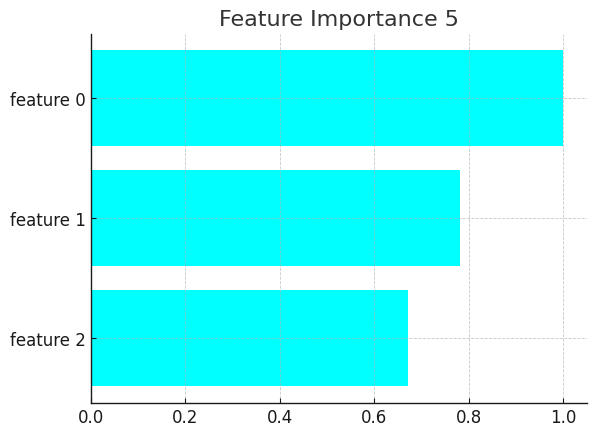

In [27]:
ds_name = 'Artificial'
experiment_name = f'ArtificialDatasets4/{ds_name}'

# for i in range(1, 6):
model_path = f'experiments/{experiment_name}/models/last-epoch.pth'
ptsnet = torch.load(model_path, map_location=torch.device('cpu'))

feat_imp = calc_feature_importance(ptsnet)
plt.barh([f'feature {i}' for i in range(len(feat_imp))], feat_imp, color='aqua')
ax_bar = plt.gca()
ax_bar.set_title(f'Feature Importance {i}')
ax_bar.invert_yaxis()
plt.show()


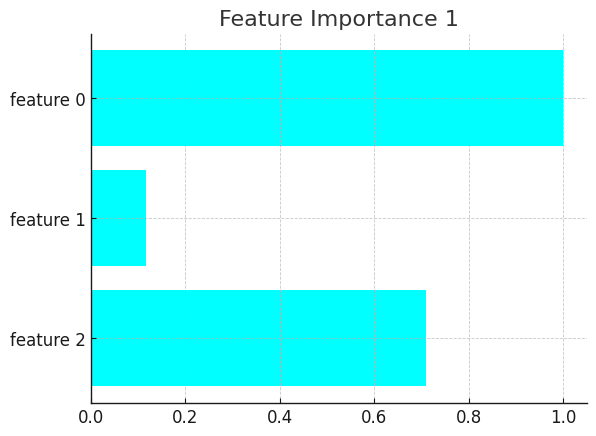

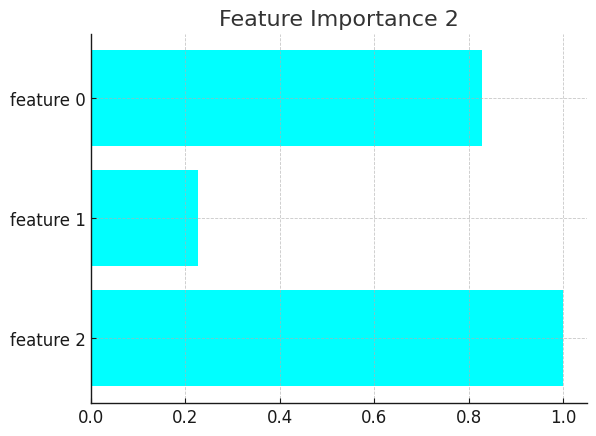

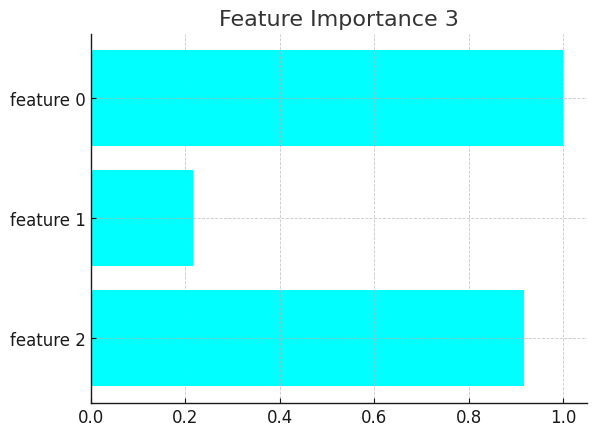

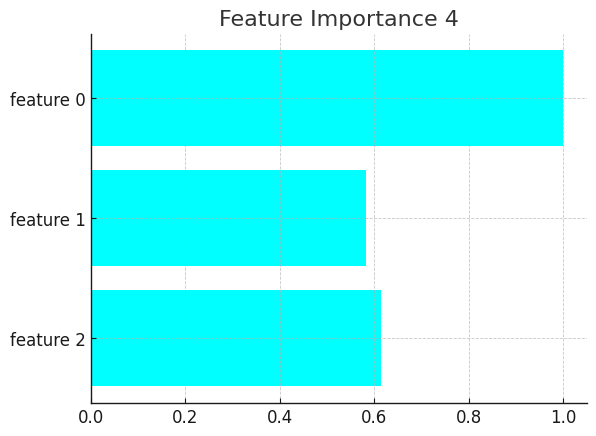

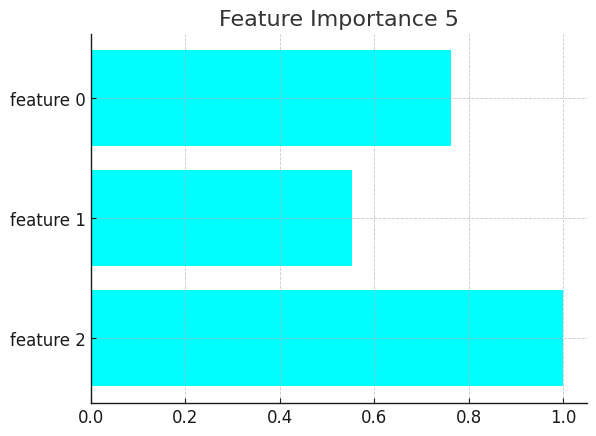

In [57]:
ds_name = 'EthanolConcentration'
experiment_name = f'{ds_name}/TestExperimentPermuting'

for i in range(1, 6):
    model_path = f'experiments/{experiment_name}{i}/models/last-epoch.pth'
    ptsnet = torch.load(model_path, map_location=torch.device('cpu'))

    feat_imp = calc_feature_importance(ptsnet)
    plt.barh([f'feature {i}' for i in range(len(feat_imp))], feat_imp, color='aqua')
    ax_bar = plt.gca()
    ax_bar.set_title(f'Feature Importance {i}')
    ax_bar.invert_yaxis()
    plt.show()


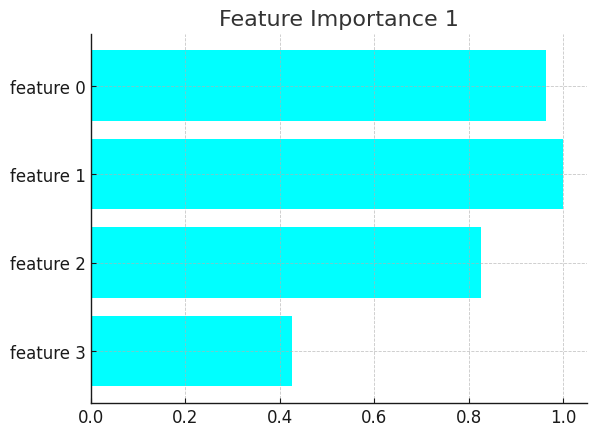

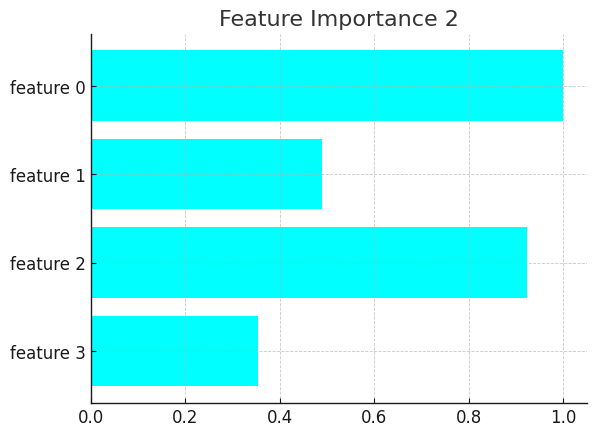

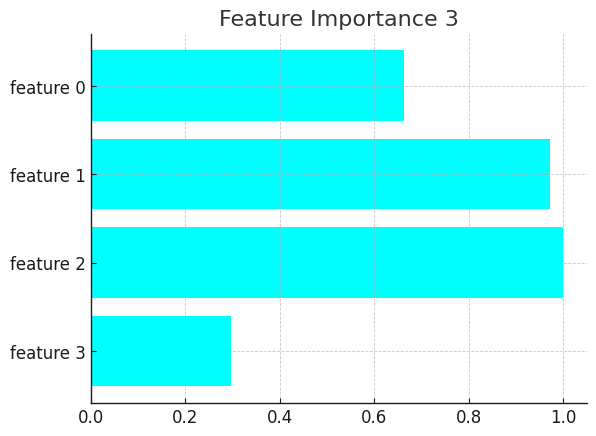

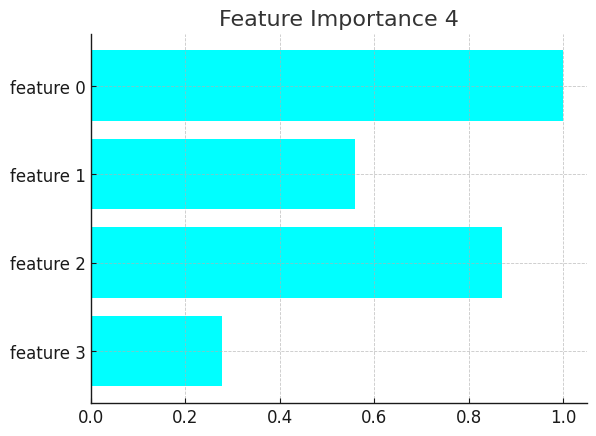

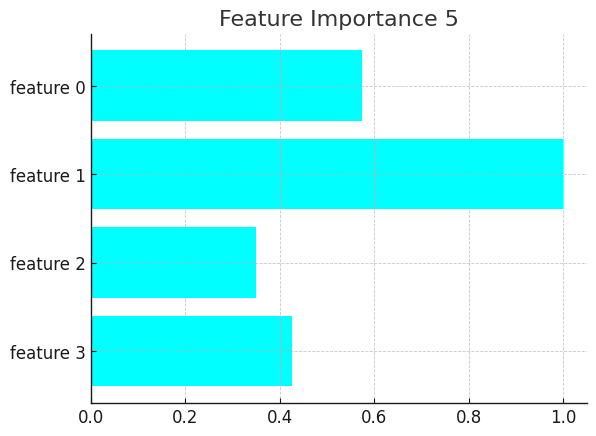

In [61]:
ds_name = 'ERing'
experiment_name = f'{ds_name}/TestExperimentPermuting'

for i in range(1, 6):
    model_path = f'experiments/{experiment_name}{i}/models/last-epoch.pth'
    ptsnet = torch.load(model_path, map_location=torch.device('cpu'))

    feat_imp = calc_feature_importance(ptsnet)
    plt.barh([f'feature {i}' for i in range(len(feat_imp))], feat_imp, color='aqua')
    ax_bar = plt.gca()
    ax_bar.set_title(f'Feature Importance {i}')
    ax_bar.invert_yaxis()
    plt.show()


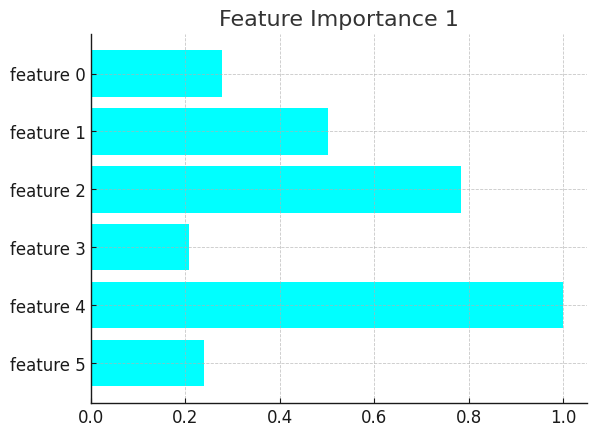

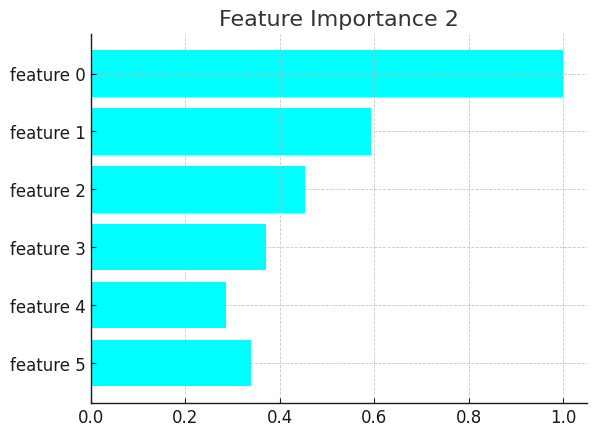

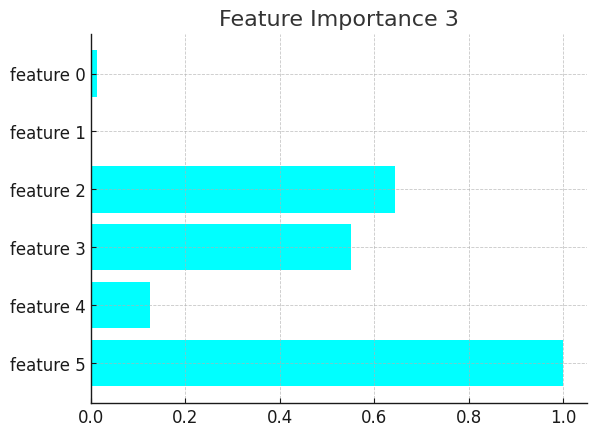

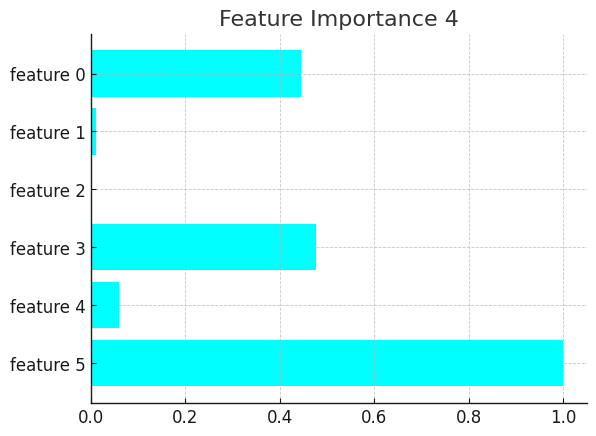

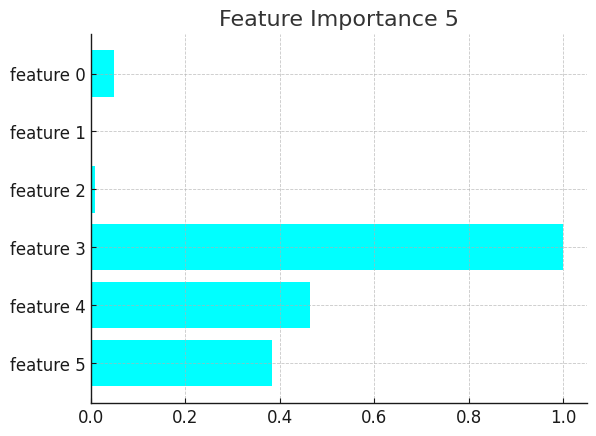

In [98]:
ds_name = 'SelfRegulationSCP1'
experiment_name = f'{ds_name}/TestExperimentPermuting'

for i in range(1, 6):
    model_path = f'experiments/{experiment_name}{i}/models/last-epoch.pth'
    ptsnet = torch.load(model_path, map_location=torch.device('cpu'))

    feat_imp = calc_feature_importance(ptsnet)
    plt.barh([f'feature {i}' for i in range(len(feat_imp))], feat_imp, color='aqua')
    ax_bar = plt.gca()
    ax_bar.set_title(f'Feature Importance {i}')
    ax_bar.invert_yaxis()
    plt.show()
